In [1]:
!pip install scikit-learn
!pip install torchvision

In [15]:
import torch
import torchvision
import warnings
from torchvision import transforms

In [20]:
transformer = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                              transforms.Lambda(lambda x: torch.flatten(x))])

data_set = torchvision.datasets.FashionMNIST('./files/fashion-mnist/', train=True, download=True,
                             transform=transformer)
batch_size=len(data_set)//10

In [21]:
loader = torch.utils.data.DataLoader(
  data_set,
  batch_size=batch_size, shuffle=True)

train = enumerate(loader)
_, (data, targets) = next(train)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

ks = [i+1 for i in range(15)]
scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    with warnings.catch_warnings(record=True):
        score = cross_val_score(
            knn,
            data,
            targets, 
            cv=5
        )
    scores.append(score.mean())
max(scores)

0.8146666666666667

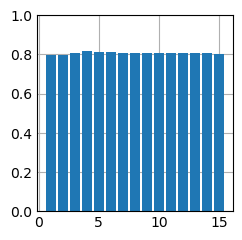

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots()

ax.bar(ks, scores)

ax.set(ylim=(0, 1))

plt.show()

Some tests of other algorithms:

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, n_jobs=-1)
score = cross_val_score(
    lr,
    data,
    targets, 
    cv=5
)
score.mean()

0.8265

In [70]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(fit_intercept=True, max_iter=10, tol=None, shuffle=False, n_jobs=-1)

score = cross_val_score(
    perceptron,
    data,
    targets, 
    cv=5
)
score.mean()

0.7823333333333333

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=600, min_samples_split=10)

score = cross_val_score(
    dt,
    data,
    targets, 
    cv=5
)

score.mean()

0.7344999999999999

In [68]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=500, min_samples_split=50), n_estimators=20)

score = cross_val_score(
    ab,
    data,
    targets, 
    cv=5
)

score.mean()

0.8063333333333332

In [69]:
from sklearn import svm

svm = svm.SVC()

score = cross_val_score(
    svm,
    data,
    targets, 
    cv=5
)

score.mean()

0.8456666666666667